In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute Euclidean distances
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Get the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [3]:
X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[2, 2], [5, 5],  [7, 6]])

# Initialize and train
knn = KNN(k=3)
knn.fit(X_train, y_train)


In [4]:
# Make predictions
y_pred = knn.predict(X_test)
print("Predictions:", y_pred)

Predictions: [0 1 1]


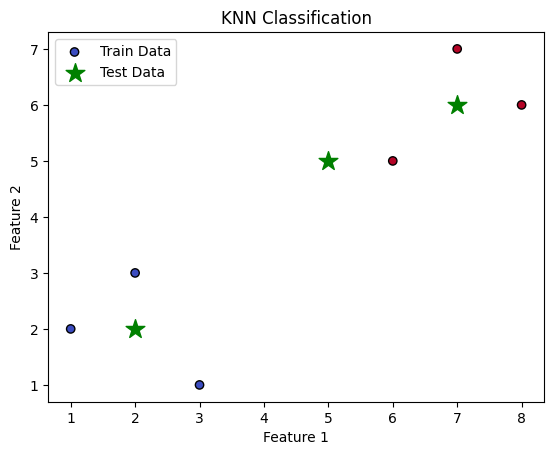

In [5]:

# Visualization
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', marker='*', s=200, label='Test Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("KNN Classification")
plt.show()
